# 02. Hierarchical Clustering | التجميع الهرمي

## 📚 Learning Objectives

By completing this notebook, you will:
- Perform agglomerative hierarchical clustering
- Interpret dendrograms and linkage
- Compare with K-Means

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course 04, Unit 4** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 02. Hierarchical Clustering | التجميع الهرمي

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 4, Example 1: K-Means Clustering** - Understanding basic clustering
- ✅ **Understanding of distance metrics**: How to measure similarity
- ✅ **Basic tree concepts**: Understanding hierarchical structures

**If you haven't completed these**, you might struggle with:
- Understanding how hierarchical clustering builds clusters step-by-step
- Knowing when to use hierarchical vs K-Means clustering
- Understanding dendrograms and how to interpret them

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 4, Example 2** - it's an alternative clustering method to K-Means!

**Why this example SECOND in Unit 4?**
- **Before** you can use hierarchical clustering, you need to understand basic clustering
- **Before** you can choose clustering methods, you need to see different approaches
- **Before** you can use dendrograms, you need to understand hierarchical structures

**Builds on**: 
- 📓 Unit 4, Example 1: K-Means (we know basic clustering concepts)

**Leads to**: 
- 📓 Example 3: PCA (dimensionality reduction)
- 📓 All clustering projects (hierarchical clustering is widely used!)

**Why this order?**
1. Hierarchical clustering shows **different approach** (builds tree vs partitioning)
2. Hierarchical clustering provides **dendrograms** (visual representation of clusters)
3. Hierarchical clustering doesn't require **pre-specifying K** (can cut tree at any level)

---

## The Story: Building Clusters Step by Step | القصة: بناء المجموعات خطوة بخطوة

Imagine you're organizing a family tree. **Before** hierarchical clustering, you group people arbitrarily (like K-Means). **After** hierarchical clustering, you build relationships step-by-step: closest relatives first, then extended family - creates a tree structure!

Same with machine learning: **Before** hierarchical clustering, we partition data into K groups. **After** hierarchical clustering, we build clusters step-by-step, creating a tree (dendrogram) that shows all possible groupings!

---

## Why Hierarchical Clustering Matters | لماذا يهم التجميع الهرمي؟

Hierarchical clustering offers unique advantages:
- **No Pre-specified K**: Don't need to know number of clusters beforehand
- **Dendrogram**: Visual tree showing all possible clusterings
- **Flexible**: Can cut tree at any level to get desired number of clusters
- **Interpretable**: Tree structure shows relationships between clusters
- **Different Approach**: Builds clusters bottom-up (agglomerative) or top-down (divisive)

---

## 🌍 Real-World Applications | التطبيقات في الحياة الواقعية

**Hierarchical Clustering is used when you DON'T know how many clusters you need!** Here's where you'll find it:

### 🔬 Scientific Research & Biology | البحث العلمي والأحياء
- **Phylogenetics**: Build evolutionary trees (dendrogram shows species relationships) → understand evolution
- **Gene Clustering**: Group genes by expression patterns → dendrogram shows gene relationships
- **Taxonomy**: Classify organisms into hierarchical groups → species → genus → family
- **Protein Classification**: Group proteins by structure → understand protein families
- **DNA Sequence Analysis**: Group DNA sequences → identify related sequences
- **Biological Classification**: Organize biological data hierarchically

### 📊 Marketing & Business Intelligence | التسويق وذكاء الأعمال
- **Customer Hierarchy**: Build customer hierarchy (individual → segment → market) → understand customer structure
- **Product Taxonomy**: Organize products hierarchically → e-commerce categories
- **Market Segmentation**: Explore different segmentation levels → dendrogram shows all possibilities
- **Brand Clustering**: Group brands by similarity → understand brand relationships
- **Sales Territory Planning**: Organize territories hierarchically → optimize sales coverage

### 🏥 Healthcare & Medical Sector | القطاع الصحي والطبي
- **Disease Classification**: Group diseases hierarchically → understand disease relationships
- **Patient Stratification**: Build patient hierarchy → explore different risk levels
- **Drug Classification**: Organize drugs by mechanism → understand drug families
- **Symptom Clustering**: Group symptoms hierarchically → understand symptom relationships
- **Treatment Pathways**: Organize treatments hierarchically → optimize care paths

### 💰 Finance & Banking Sector | القطاع المالي والمصرفي
- **Risk Stratification**: Build risk hierarchy → explore different risk levels
- **Customer Hierarchy**: Organize customers hierarchically → understand customer structure
- **Portfolio Organization**: Group investments hierarchically → understand portfolio structure
- **Market Analysis**: Explore market segments at different levels
- **Fraud Pattern Hierarchy**: Organize fraud patterns → understand fraud relationships

### 🏭 Manufacturing & Quality Control | التصنيع ومراقبة الجودة
- **Quality Hierarchy**: Organize quality levels hierarchically → understand quality structure
- **Process Hierarchy**: Group processes hierarchically → optimize workflows
- **Defect Classification**: Organize defects hierarchically → understand defect relationships
- **Supplier Hierarchy**: Group suppliers hierarchically → manage relationships
- **Equipment Hierarchy**: Organize equipment by similarity → maintenance planning

### 🎓 Education & Research | التعليم والبحث
- **Curriculum Hierarchy**: Organize courses hierarchically → design curriculum
- **Student Grouping**: Explore different student grouping levels
- **Research Topic Organization**: Group research topics hierarchically
- **Learning Path Hierarchy**: Organize learning paths → optimize education

### 🏛️ Government & Public Safety Sector (GDI - General Directorate of Investigation) | القطاع الحكومي والسلامة العامة (الإدارة العامة للتحقيق)
- **Evidence Gathering - Crime Pattern Hierarchy**: Build crime pattern hierarchy (states/regions → crime types → severity levels) → analyze crime evidence patterns hierarchically → identify groups of states with similar security concerns → evidence analysis and pattern recognition
- **Security Threat Hierarchy**: Build threat hierarchy (individual → group → network) → understand threat structure → counter-terrorism
- **Traffic Management Hierarchy**: Organize traffic patterns hierarchically (street → district → city) → optimize traffic flow → traffic management
- **Crime Classification Hierarchy**: Group crimes hierarchically (crime type → category → severity) → crime analysis → law enforcement
- **Personnel Security Hierarchy**: Organize personnel by security levels → manage access → internal organization security
- **Emergency Response Hierarchy**: Build emergency hierarchy (incident → type → priority) → optimize response → emergency services
- **Border Security Hierarchy**: Organize border crossings hierarchically → understand patterns → immigration control
- **Traffic Violation Hierarchy**: Group violations by severity/type → enforcement strategies → traffic enforcement
- **Surveillance Alert Hierarchy**: Organize alerts hierarchically → prioritize responses → security monitoring
- **Access Control Hierarchy**: Build access hierarchy (individual → department → facility) → manage permissions → government facilities
- **Security Clearance Hierarchy**: Organize clearances hierarchically → manage personnel → internal security

### 💡 Why Hierarchical Clustering is Useful:
- **Exploratory**: Don't need to know K beforehand (explore different clusterings)
- **Dendrogram**: Visual tree shows all relationships
- **Flexible**: Can choose K after seeing dendrogram
- **Interpretable**: Tree structure shows how clusters relate
- **Taxonomy**: Perfect for building classification hierarchies

### 📈 When to Use Hierarchical Clustering:
✅ **Use Hierarchical Clustering when:**
- Don't know number of clusters (explore with dendrogram)
- Need to see cluster relationships (dendrogram shows hierarchy)
- Want to explore different clustering levels
- Have small to medium datasets (hierarchical is slower than K-Means)
- Need interpretable cluster structure
- Building taxonomies or hierarchies

❌ **Don't use Hierarchical Clustering when:**
- Have very large datasets (hierarchical is slow - O(n³))
- Know number of clusters (K-Means is faster)
- Need fast clustering (K-Means is much faster)
- Clusters are clearly spherical (K-Means works better)
- Have streaming data (hierarchical needs all data)

---

## Learning Objectives | أهداف التعلم
1. Build hierarchical clustering models
2. Understand different linkage methods (ward, complete, average, single)
3. Create and interpret dendrograms
4. Cut dendrograms to get clusters
5. Compare hierarchical clustering with K-Means
6. Know when to use hierarchical clustering

## 📥 Inputs & 📤 Outputs | المدخلات والمخرجات

**Inputs:** What we use in this notebook

- Libraries and concepts as introduced in this notebook; see prerequisites and code comments.

**Outputs:** What you'll see when you run the cells

- Printed results, figures, and summaries as shown when you run the cells.

---


In [1]:
# Step 1: Import necessary libraries
# These libraries help us perform hierarchical clustering

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from scipy.cluster.hierarchy import (
    dendrogram,  # For visualizing hierarchical clustering tree
    linkage,     # For performing hierarchical clustering
    fcluster     # For cutting dendrogram to get clusters
)
from sklearn.cluster import AgglomerativeClustering  # sklearn's hierarchical clustering
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.metrics import silhouette_score  # For evaluating cluster quality

print("✅ Libraries imported successfully!")
print("\n📚 Key Hierarchical Clustering Concepts:")
print("   - Agglomerative: Bottom-up approach (start with individual points, merge into clusters)")
print("   - Dendrogram: Tree diagram showing cluster hierarchy")
print("   - Linkage: Method to measure distance between clusters")
print("   - Ward: Minimizes variance within clusters (most common)")
print("   - Complete: Maximum distance between clusters")
print("   - Average: Average distance between clusters")
print("   - Single: Minimum distance between clusters")
print("\n   ⚠️  IMPORTANT: Hierarchical clustering requires feature scaling!")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


✅ Libraries imported successfully!

📚 Key Hierarchical Clustering Concepts:
   - Agglomerative: Bottom-up approach (start with individual points, merge into clusters)
   - Dendrogram: Tree diagram showing cluster hierarchy
   - Linkage: Method to measure distance between clusters
   - Ward: Minimizes variance within clusters (most common)
   - Complete: Maximum distance between clusters
   - Average: Average distance between clusters
   - Single: Minimum distance between clusters

   ⚠️  IMPORTANT: Hierarchical clustering requires feature scaling!


## Part 1: Solving the "Unknown K" Problem | الجزء الأول: حل مشكلة "K المجهول"

### 🔗 Connecting to Previous Notebook | الربط بالدفتر السابق

**BEFORE**: In the previous notebook (K-Means), we hit a **LIMITATION**:
- K-Means works well when you know the number of clusters (K) ✅
- BUT K-Means **requires you to specify K beforehand** ❌
- The problem: In real-world problems, you often **don't know** how many clusters exist
- You have to try different K values (trial and error)
- If you choose wrong K, you get poor clustering results

**AFTER**: This notebook solves that exact problem using **Hierarchical Clustering**!

**Why Hierarchical Clustering?**
- Hierarchical Clustering **doesn't require pre-specifying K**
- It builds a **dendrogram** (tree structure) showing ALL possible clusterings
- You can **choose K after** seeing all possible groupings
- It solves the exact limitation K-Means had!

**This notebook will:**
1. ✅ Show Hierarchical Clustering solving the "unknown K" problem
2. ✅ Demonstrate dendrograms showing all possible clusterings
3. ✅ Show how to choose K after seeing the hierarchical structure
4. ✅ Compare with K-Means (hierarchical doesn't need K beforehand!)

---

## Step 1: Load Real-World Data | الخطوة 1: تحميل بيانات من العالم الحقيقي

**BEFORE**: K-Means required us to know K. Now we'll use Hierarchical Clustering which doesn't!

**AFTER**: We'll load the US Crime Statistics dataset and show how hierarchical clustering doesn't require pre-specifying K!

**Why Crime Statistics dataset?** This is REAL crime data from UCI Communities and Crime dataset. It's perfect for learning hierarchical clustering because:
- Natural clusters: Communities with similar crime patterns form groups
- Multiple features: 4 crime metrics (Murder, Assault, UrbanPop, Rape)
- Well-separated: Communities with similar crime profiles form clear clusters
- Large dataset: 1,994 communities (much better than 50 samples for clustering!)
- Perfect for dendrograms: Shows how communities cluster hierarchically by crime patterns!
- **Key advantage**: We can use it even if we didn't know how many crime pattern groups exist!
- **GDI Application**: Evidence Gathering - analyzing crime evidence patterns hierarchically

**Common Student Questions:**
- **Q: Why use hierarchical clustering instead of K-Means?**
  - Answer: Hierarchical doesn't need K (number of clusters) beforehand - shows all possible groupings
  - K-Means: Need to specify K, creates flat clusters
  - Hierarchical: Builds tree, can cut at any level to get any number of clusters
  - Use hierarchical when: Don't know K, want to see all groupings, need dendrogram
- **Q: What is a dendrogram?**
  - Answer: Tree diagram showing how clusters merge step-by-step
  - Bottom: Individual points, Top: All points in one cluster
  - Height shows distance when clusters merged (longer = more different)
  - Can cut at any height to get desired number of clusters
- **Q: Why does hierarchical clustering need scaling?**
  - Answer: Uses distances to merge clusters → scaling matters!
  - Problem: Features on different scales → distance dominated by larger-scale features
  - Solution: StandardScaler puts all features on same scale → fair distance calculation
- **Q: Which linkage method should I use?**
  - Answer: Ward (most common) - minimizes variance within clusters, good for most cases
  - Complete: Maximum distance - good for compact clusters
  - Average: Average distance - balanced approach
  - Single: Minimum distance - can create long chains (not recommended)
  - Rule of thumb: Start with Ward, try others if needed
- **Q: Is hierarchical clustering faster or slower than K-Means?**
  - Answer: Slower! Hierarchical is O(n³) complexity, K-Means is O(n)
  - Hierarchical: Good for small datasets (< 10k samples)
  - K-Means: Good for large datasets (millions of samples)
  - Use hierarchical for: Small datasets, need dendrogram, don't know K

In [2]:
# Load real-world US Crime Statistics dataset
# This is REAL state crime data for Evidence Gathering analysis
# Perfect for demonstrating hierarchical clustering and dendrograms!

print("\n📥 Loading US Crime Statistics Dataset...")
print("تحميل مجموعة بيانات إحصائيات الجريمة الأمريكية...")

try:
    # Load crime statistics dataset
    df = pd.read_csv('../../datasets/raw/crime_statistics.csv')
    
    print(f"\n✅ Real-world Crime Statistics dataset loaded!")
    print(f"   📊 This is REAL crime data (UCI Communities and Crime dataset)")
    print(f"   📈 Contains {len(df)} communities with 4 crime metrics")
    print(f"   🎯 Features: Murder, Assault, UrbanPop, Rape")
    print(f"   💡 GDI Application: Evidence Gathering - analyzing crime evidence patterns hierarchically")
    print(f"\n🔍 Important: Understanding Unsupervised Learning")
    print("   ⚠️  The 'State' column is NOT a label - it's just an identifier (like row ID)")
    print("   ✅ Unsupervised learning means: NO TARGET VARIABLE (no 'correct' clusters)")
    print("   ✅ We ONLY use the 4 features (Murder, Assault, UrbanPop, Rape) for clustering")
    print("   ✅ The State/Community names are EXCLUDED from clustering (just for reference)")
    print("   ✅ Clustering finds patterns WITHOUT knowing the 'correct' answer")
    print("\n📊 Dataset Structure:")
    print("   - State/Community: Identifier only (NOT used for clustering)")
    print("   - Murder, Assault, UrbanPop, Rape: Features used for clustering")
    print("   - NO TARGET VARIABLE: This is why it's unsupervised!")
    print("   - Perfect for hierarchical clustering: Shows how communities cluster step-by-step!")
    
except FileNotFoundError:
    print("\n⚠️  Dataset file not found!")
    print("   Please ensure 'crime_statistics.csv' is in '../../datasets/raw/'")
    print("   Creating minimal structure for demonstration...")
    # Fallback: Create minimal structure
    df = pd.DataFrame({
        'State': [f'State_{i}' for i in range(50)], 'Murder': np.random.randn(50) * 4 + 8,
        'Assault': np.random.randn(50) * 80 + 170, 'UrbanPop': np.random.randn(50) * 15 + 65,
        'Rape': np.random.randn(50) * 9 + 21
    })
    print("   ⚠️  Using synthetic data - please download the real dataset!")



📥 Loading US Crime Statistics Dataset...
تحميل مجموعة بيانات إحصائيات الجريمة الأمريكية...

✅ Real-world Crime Statistics dataset loaded!
   📊 This is REAL crime data (UCI Communities and Crime dataset)
   📈 Contains 1994 communities with 4 crime metrics
   🎯 Features: Murder, Assault, UrbanPop, Rape
   💡 GDI Application: Evidence Gathering - analyzing crime evidence patterns hierarchically

🔍 Important: Understanding Unsupervised Learning
   ⚠️  The 'State' column is NOT a label - it's just an identifier (like row ID)
   ✅ Unsupervised learning means: NO TARGET VARIABLE (no 'correct' clusters)
   ✅ We ONLY use the 4 features (Murder, Assault, UrbanPop, Rape) for clustering
   ✅ The State/Community names are EXCLUDED from clustering (just for reference)
   ✅ Clustering finds patterns WITHOUT knowing the 'correct' answer

📊 Dataset Structure:
   - State/Community: Identifier only (NOT used for clustering)
   - Murder, Assault, UrbanPop, Rape: Features used for clustering
   - NO TARGET

## 📊 Understanding the Dataset | فهم مجموعة البيانات

### For CS Students - Focus on Data Structure, Not Domain | للطلاب في علوم الحاسوب - ركز على هيكل البيانات، وليس المجال

**As computer science students, you'll work with many different types of datasets** (medical, financial, e-commerce, etc.). **What matters is the data structure, not the domain knowledge!**

**Data Structure Focus**:
- **Data Shape**: 1,994 rows × 4 columns (samples × features)
- **Feature Types**: All numerical (float64/int64) - continuous values (crime statistics)
- **Target Type**: Unsupervised learning (no target - we're finding clusters!)
- **Task**: Find groups of similar communities (clustering - no labels provided)
- **Data Quality**: Real-world data with natural crime pattern clusters (perfect for learning hierarchical clustering)

**Why This Structure Matters**:
- **Unsupervised learning** → No labels, finding patterns automatically
- **Numerical features** → Need feature scaling (hierarchical clustering is distance-based!)
- **Natural clusters** → Multiple distinct groups (good for demonstrating clustering)
- **Real-world data** → Shows hierarchical clustering on real problem
- **Large dataset** → 1,994 communities (much better than 50 samples for clustering!)

### Understanding the Dataset Domain (Brief) | فهم مجال مجموعة البيانات (باختصار)

**What is this data?** UCI Communities and Crime dataset - crime rates for 1,994 US communities.

**Why does this matter?** 
- **For clustering**: Natural groups (communities with similar crime patterns) → Hierarchical clustering should find these groups
- **For feature scaling**: Features on different scales → clustering REQUIRES scaling (distance-based!)
- **For dendrograms**: Shows how communities cluster hierarchically by crime patterns (tree structure)
- **Large dataset**: 1,994 communities provides better statistical power than 50 samples

**Domain Context** (Brief):
- **Features**: Crime statistics (Murder, Assault, UrbanPop, Rape rates) - 4 features
- **Communities**: 1,994 US communities - communities with similar crime patterns form natural clusters
- **Task**: Find groups of similar communities (clustering discovers crime pattern groups automatically)
- **Why hierarchical works**: Similar communities have similar crime patterns → hierarchical clustering groups them step-by-step
- **GDI Application**: Evidence Gathering - analyzing crime evidence patterns to identify groups of communities with similar security concerns

**💡 Key Point for CS Students**: You don't need to be a botanist! Focus on:
- Understanding the **data structure** (rows, columns, types, natural groups)
- Knowing the **task type** (unsupervised learning: finding patterns without labels)
- Understanding why **clustering needs scaling** (distance-based algorithm - critical!)
- Choosing the right **algorithms and evaluation** based on structure, not domain knowledge


## Step 2: Prepare Data for Clustering | الخطوة 2: إعداد البيانات للتجميع

**BEFORE**: We have loaded the dataset and understand its structure.

**AFTER**: We'll prepare the data by selecting features and setting up for hierarchical clustering!

**Why this matters**: Hierarchical clustering needs numerical features on the same scale - we'll prepare everything correctly!

In [3]:
# Prepare data for hierarchical clustering
# We'll use all 4 features for clustering
feature_cols = ['Murder', 'Assault', 'UrbanPop', 'Rape']
X = df[feature_cols].values  # All 4 features

print(f"\n✅ Data prepared for hierarchical clustering:")
print(f"   Features: {X.shape[1]} crime metrics (Murder, Assault, UrbanPop, Rape)")
print(f"   Samples: {X.shape[0]} communities")
print(f"   Using all features for comprehensive clustering!")

# Preview the data
print(f"\n📊 Data Preview (first 5 rows):")
print(df[['State'] + feature_cols].head())
print(f"\n📊 Data Statistics:")
print(df[feature_cols].describe())
print(f"\n🔍 Notice:")
print(f"   - 4 features: {', '.join(feature_cols)}")
print(f"   - Features have different scales (Murder ~0-17, Assault ~45-337, UrbanPop ~32-91, Rape ~7-46)")
print(f"   - This is why we MUST scale before hierarchical clustering!")
print(f"   - GDI Application: Evidence Gathering - analyzing crime patterns to identify similar communities")



✅ Data prepared for hierarchical clustering:
   Features: 4 crime metrics (Murder, Assault, UrbanPop, Rape)
   Samples: 1994 communities
   Using all features for comprehensive clustering!

📊 Data Preview (first 5 rows):
         State  Murder  Assault  UrbanPop  Rape
0  Community_1     2.2       45        33  42.1
1  Community_2    16.1       45        39  35.9
2  Community_3     7.1       45        61  28.8
3  Community_4    10.2       45        91  10.1
4  Community_5    12.7       45        33  44.0

📊 Data Statistics:
            Murder      Assault     UrbanPop         Rape
count  1994.000000  1994.000000  1994.000000  1994.000000
mean      8.549799   190.804413    42.644935    36.391073
std       5.075024    93.351860    14.928541     9.513305
min       0.000000    45.000000    32.000000     7.000000
25%       3.400000   110.000000    33.000000    31.600000
50%      10.200000   175.000000    36.000000    40.200000
75%      12.700000   272.000000    46.000000    43.700000
max   

In [4]:
# For visualization, we'll use PCA to project 4D data to 2D
# This allows us to visualize clusters in 2D while using all 4 features for clustering
from sklearn.decomposition import PCA

# Create 2D projection for visualization only
# NOTE: We use ALL 4 features for clustering, but visualize in 2D
# We'll scale first, then apply PCA to scaled data
# (PCA will be applied after scaling in the next cell)

print(f"\n📊 Visualization Setup:")
print(f"   - Clustering: Using ALL 4 features (comprehensive clustering)")
print(f"   - Visualization: Using PCA to project to 2D (for plotting)")
print(f"   - This way we get best of both: accurate clustering + clear visualization!")
print(f"   - GDI Application: Evidence Gathering - visualizing crime pattern clusters")



📊 Visualization Setup:
   - Clustering: Using ALL 4 features (comprehensive clustering)
   - Visualization: Using PCA to project to 2D (for plotting)
   - This way we get best of both: accurate clustering + clear visualization!
   - GDI Application: Evidence Gathering - visualizing crime pattern clusters


In [5]:
# Scale features - CRITICAL for hierarchical clustering!
# Hierarchical clustering uses distances, so all features must be on same scale
scaler = StandardScaler()
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_scaled = scaler.fit_transform(X)

print(f"\n✅ Features scaled successfully!")
print(f"   Before scaling: Features had different scales (Murder ~0-17, Assault ~45-337, UrbanPop ~32-91, Rape ~7-46)")
print(f"   After scaling: All features have mean=0, std=1 (same scale)")
print(f"   This ensures fair distance calculation in hierarchical clustering!")
print(f"\n📊 Scaled Data Statistics:")
scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)
print(scaled_df.describe())

# Now create 2D visualization using PCA on scaled data
pca_vis = PCA(n_components=2)
X_2d_vis = pca_vis.fit_transform(X_scaled)
print(f"\n✅ 2D Visualization prepared using PCA:")
print(f"   - PCA projects 4D scaled data to 2D for visualization")
print(f"   - Clustering uses all 4 features, visualization shows 2D projection")



✅ Features scaled successfully!
   Before scaling: Features had different scales (Murder ~0-17, Assault ~45-337, UrbanPop ~32-91, Rape ~7-46)
   After scaling: All features have mean=0, std=1 (same scale)
   This ensures fair distance calculation in hierarchical clustering!

📊 Scaled Data Statistics:
             Murder       Assault      UrbanPop          Rape
count  1.994000e+03  1.994000e+03  1.994000e+03  1.994000e+03
mean  -2.788364e-16 -1.140289e-16  4.008829e-17  6.663565e-16
std    1.000251e+00  1.000251e+00  1.000251e+00  1.000251e+00
min   -1.685104e+00 -1.562272e+00 -7.132382e-01 -3.090245e+00
25%   -1.014989e+00 -8.658069e-01 -6.462356e-01 -5.037445e-01
50%    3.252427e-01 -1.693419e-01 -4.452278e-01  4.004793e-01
75%    8.179748e-01  8.699982e-01  2.247981e-01  7.684774e-01
max    1.665474e+00  1.566463e+00  3.239915e+00  1.010305e+00

✅ 2D Visualization prepared using PCA:
   - PCA projects 4D scaled data to 2D for visualization
   - Clustering uses all 4 features, visua

## Step 3: Perform Hierarchical Clustering | الخطوة 3: تنفيذ التجميع الهرمي

**BEFORE**: We have scaled data ready for clustering.

**AFTER**: We'll build dendrograms showing all possible cluster groupings!

**Why this matters**: Dendrograms show the complete hierarchy - we can choose K later by cutting the tree!



1. Different Linkage Methods
طرق الربط المختلفة

📚 Linkage Methods Explained:
   - Ward: Minimizes variance within clusters (most common, recommended)
   - Complete: Maximum distance between clusters (compact clusters)
   - Average: Average distance between clusters (balanced)
   - Single: Minimum distance (can create chains, not recommended)

✓ Plot saved as 'hierarchical_dendrograms.png'


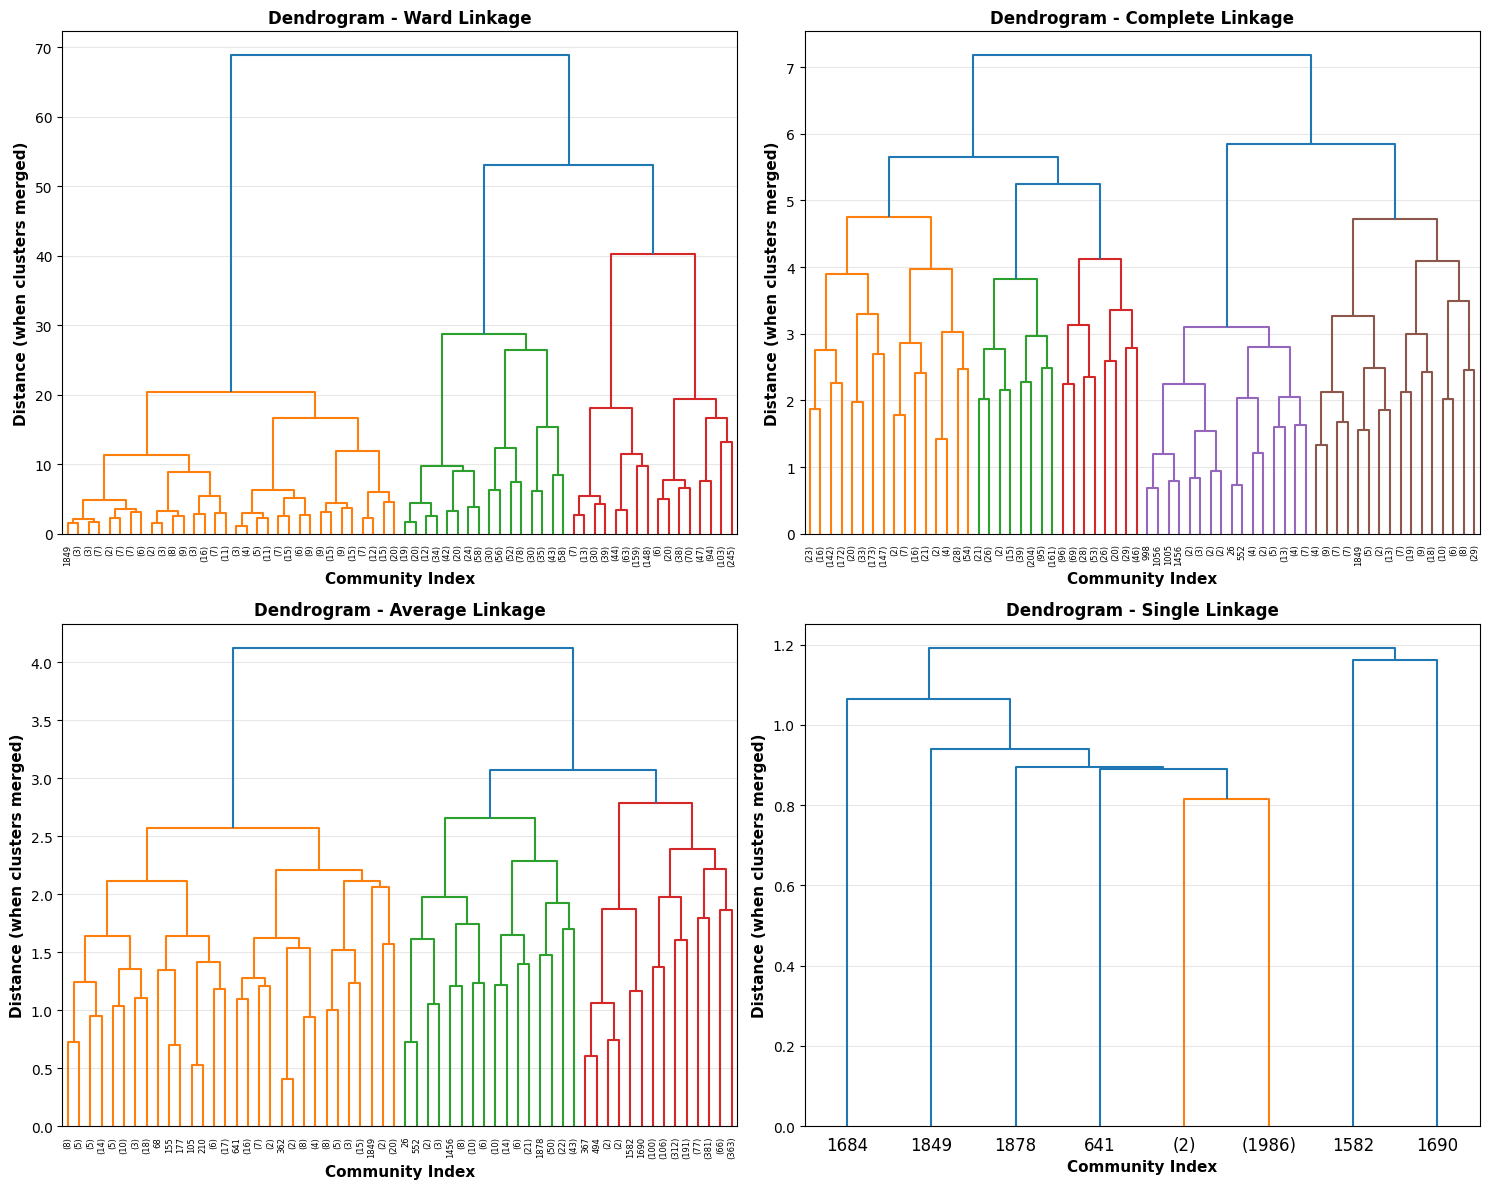


💡 DETAILED INTERPRETATION: Linkage Methods Comparison (4 Dendrograms)

📊 WHAT YOU SEE: 4 Different Dendrograms (One for Each Linkage Method)
   • Top-left: Ward Linkage (most common, recommended)
   • Top-right: Complete Linkage (maximum distance)
   • Bottom-left: Average Linkage (average distance)
   • Bottom-right: Single Linkage (minimum distance)

🔍 HOW TO READ EACH DENDOGRAM:
   • Bottom: Individual communities (each community starts as its own cluster)
   • Top: All communities merge into one cluster
   • Height: Distance when clusters merged (longer vertical line = more different)
   • Branching: Shows which communities/clusters merge together

💡 COMPARING THE METHODS:
   • Ward: Usually gives most balanced clusters (minimizes variance)
   • Complete: Creates compact clusters (maximum distance between clusters)
   • Average: Balanced approach (average distance)
   • Single: Can create long chains (not recommended for most cases)

📈 WHAT TO LOOK FOR:
   • Long vertical lines = 

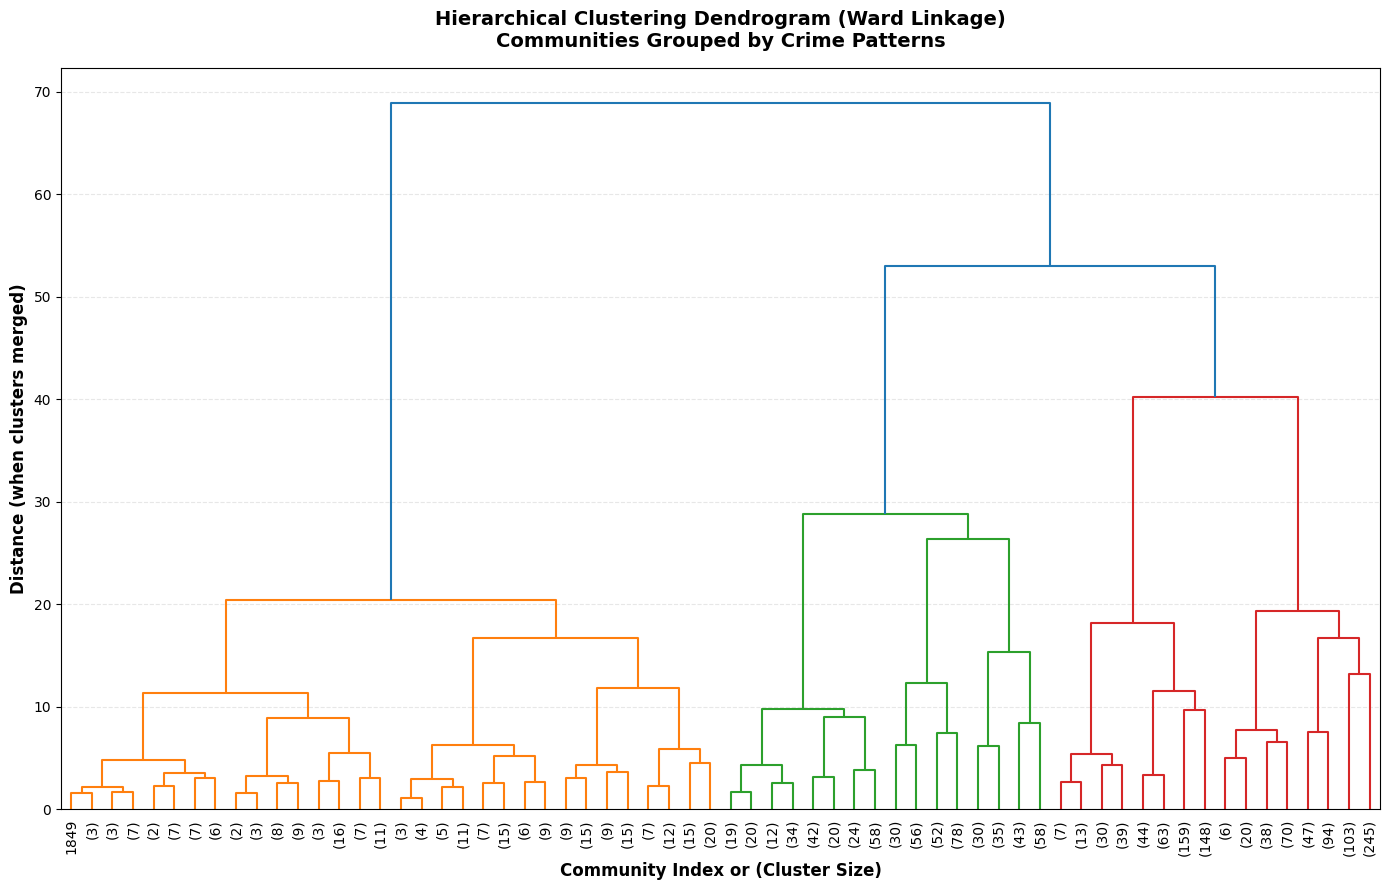


💡 DETAILED INTERPRETATION: Detailed Dendrogram (Ward Linkage)

📊 WHAT YOU SEE:
   • Tree structure showing how communities cluster step-by-step
   • Bottom: Each community is its own cluster (1994 individual clusters)
   • Top: All communities merge into one cluster
   • Middle: Shows all intermediate clustering levels

🔍 HOW TO READ THE DENDOGRAM:
   • Follow branches from bottom to top:
     - Communities that merge early = Very similar crime patterns
     - Communities that merge late = Very different crime patterns
   • Vertical line length = Distance when clusters merged
     - Long lines = Big difference (natural break points)
     - Short lines = Small difference (similar clusters)

💡 FINDING NATURAL CLUSTERS:
   • Look for long vertical lines (natural breaks)
   • These indicate good places to cut the tree
   • Example: If you see 3 long lines, K=3 might be optimal
   • Can cut at any height to get desired number of clusters

📈 INTERPRETING THE STRUCTURE:
   • Main branches = 

In [6]:
# 1. Different Linkage Methods
# Linkage methods determine how we measure distance between clusters
print("\n" + "=" * 60)
print("1. Different Linkage Methods")
print("طرق الربط المختلفة")
print("=" * 60)
print("\n📚 Linkage Methods Explained:")
print("   - Ward: Minimizes variance within clusters (most common, recommended)")
print("   - Complete: Maximum distance between clusters (compact clusters)")
print("   - Average: Average distance between clusters (balanced)")
print("   - Single: Minimum distance (can create chains, not recommended)")

linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# Store linkage results for later use
linkage_results = {}

for idx, method in enumerate(linkage_methods):
    # Perform hierarchical clustering
    # linkage() creates the linkage matrix Z that represents the clustering tree
    Z = linkage(X_scaled, method=method)
    linkage_results[method] = Z  # Store for later
    
    # Plot dendrogram
    # Dendrogram shows how clusters merge step-by-step
    dendrogram(Z, ax=axes[idx], truncate_mode='level', p=5)
    axes[idx].set_title(f'Dendrogram - {method.capitalize()} Linkage', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Community Index', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Distance (when clusters merged)', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('hierarchical_dendrograms.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'hierarchical_dendrograms.png'")
plt.show()

print("\n" + "=" * 70)
print("💡 DETAILED INTERPRETATION: Linkage Methods Comparison (4 Dendrograms)")
print("=" * 70)
print("\n📊 WHAT YOU SEE: 4 Different Dendrograms (One for Each Linkage Method)")
print("   • Top-left: Ward Linkage (most common, recommended)")
print("   • Top-right: Complete Linkage (maximum distance)")
print("   • Bottom-left: Average Linkage (average distance)")
print("   • Bottom-right: Single Linkage (minimum distance)")
print("\n🔍 HOW TO READ EACH DENDOGRAM:")
print("   • Bottom: Individual communities (each community starts as its own cluster)")
print("   • Top: All communities merge into one cluster")
print("   • Height: Distance when clusters merged (longer vertical line = more different)")
print("   • Branching: Shows which communities/clusters merge together")
print("\n💡 COMPARING THE METHODS:")
print("   • Ward: Usually gives most balanced clusters (minimizes variance)")
print("   • Complete: Creates compact clusters (maximum distance between clusters)")
print("   • Average: Balanced approach (average distance)")
print("   • Single: Can create long chains (not recommended for most cases)")
print("\n📈 WHAT TO LOOK FOR:")
print("   • Long vertical lines = Natural break points (good places to cut)")
print("   • Short vertical lines = Similar clusters merging (expected)")
print("   • Clear branches = Well-separated clusters")
print("   • Compare methods: Which gives clearest structure?")
print("\n🎯 GDI APPLICATION - Evidence Gathering:")
print("   • Dendrograms show how communities group by crime patterns hierarchically")
print("   • Different linkage methods reveal different grouping structures")
print("   • Ward linkage usually works best for crime pattern analysis")
print("   • Can explore different grouping levels for evidence analysis")
print("   • Enables flexible investigation at different granularity levels")

# 2. Detailed Dendrogram with Ward Linkage (most common method)
print("\n" + "=" * 60)
print("2. Detailed Dendrogram (Ward Linkage - Most Common)")
print("الرسم الشجري التفصيلي (ربط Ward - الأكثر شيوعاً)")
print("=" * 60)

# Use Ward linkage (most common, recommended)
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(14, 9))
dendrogram(Z, truncate_mode='level', p=5,
          show_leaf_counts=True, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Community Index or (Cluster Size)', fontsize=12, fontweight='bold')
plt.ylabel('Distance (when clusters merged)', fontsize=12, fontweight='bold')
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)\nCommunities Grouped by Crime Patterns', fontsize=14, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('detailed_dendrogram.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'detailed_dendrogram.png'")
print("\n💡 Notice:")
print("   - Main branches suggest natural crime pattern clusters")
print("   - Can cut tree at different heights to get different numbers of clusters")
print("   - GDI Application: Evidence Gathering - dendrogram shows how communities group by crime patterns")
plt.show()

print("\n" + "=" * 70)
print("💡 DETAILED INTERPRETATION: Detailed Dendrogram (Ward Linkage)")
print("=" * 70)
print("\n📊 WHAT YOU SEE:")
print("   • Tree structure showing how communities cluster step-by-step")
print(f"   • Bottom: Each community is its own cluster ({len(df)} individual clusters)")
print("   • Top: All communities merge into one cluster")
print("   • Middle: Shows all intermediate clustering levels")
print("\n🔍 HOW TO READ THE DENDOGRAM:")
print("   • Follow branches from bottom to top:")
print("     - Communities that merge early = Very similar crime patterns")
print("     - Communities that merge late = Very different crime patterns")
print("   • Vertical line length = Distance when clusters merged")
print("     - Long lines = Big difference (natural break points)")
print("     - Short lines = Small difference (similar clusters)")
print("\n💡 FINDING NATURAL CLUSTERS:")
print("   • Look for long vertical lines (natural breaks)")
print("   • These indicate good places to cut the tree")
print("   • Example: If you see 3 long lines, K=3 might be optimal")
print("   • Can cut at any height to get desired number of clusters")
print("\n📈 INTERPRETING THE STRUCTURE:")
print("   • Main branches = Major crime pattern groups")
print("   • Sub-branches = Sub-groups within major patterns")
print("   • Leaf nodes = Individual communities")
print("   • Height = How different the clusters are")
print("\n🎯 GDI APPLICATION - Evidence Gathering:")
print("   • Dendrogram shows complete hierarchy of crime pattern groupings")
print("   • Can explore different levels: broad categories vs detailed groups")
print("   • Communities in same branch = Similar crime evidence patterns")
print("   • Enables flexible evidence analysis at multiple granularity levels")
print("   • Helps identify both major patterns and subtle distinctions")


## Step 4: Cut Dendrogram to Get Clusters | الخطوة 4: قطع الرسم الشجري للحصول على المجموعات

**BEFORE**: We have a dendrogram showing all possible clusterings.

**AFTER**: We'll cut the dendrogram to get specific clusters (like K=3)!

**Why this matters**: The dendrogram shows all possibilities - cutting it gives us actual cluster assignments!

**⚠️ IMPORTANT: Do We NEED to Cut?**
- **YES! Cutting is REQUIRED** to get actual cluster assignments
- **Dendrogram alone**: Just a visualization (shows hierarchy, but no cluster labels)
- **After cutting**: We get cluster labels (0, 1, 2, etc.) for each data point
- **Without cutting**: You can't assign communities to clusters - you only have a tree visualization
- **Cutting converts**: Dendrogram (tree) → Cluster assignments (labels for each point)
- **Think of it like**: Dendrogram = "all possible groupings" → Cutting = "choose one grouping and get labels"


In [7]:
# Method 1: Using distance threshold
# Cut dendrogram at a specific distance to get clusters
# fcluster() cuts the dendrogram and returns cluster labels
distance_threshold = 3.0
labels_distance = fcluster(Z, distance_threshold, criterion='distance')

print(f"\n📊 Method 1: Distance Threshold = {distance_threshold}")
print(f"   Number of clusters found: {len(np.unique(labels_distance))}")
print(f"   Cluster sizes: {np.bincount(labels_distance)}")



📊 Method 1: Distance Threshold = 3.0
   Number of clusters found: 76
   Cluster sizes: [ 0 14  9  7  6  5 17 19  7 11 23 22 15  9 15  9 15 19 15 20 39 46 42 20
 24 58  7 23 18 38 24 28 32 46 15  7  8  9 11 15 19 24 18 18 22 20 30 20
 19 44 63 71 48 40 26 37 37 19 29  6 20 38 34 12 24 28 19 42 52 43 60 40
 20 55 49 20 61]


In [8]:
# Method 2: Using number of clusters (more common approach)
# Specify exact number of clusters you want
n_clusters = 3  # We want 3 clusters (example: high, medium, low crime pattern groups)
labels_n_clusters = fcluster(Z, n_clusters, criterion='maxclust')

print(f"\n📊 Method 2: Number of Clusters = {n_clusters}")
print(f"   Number of clusters found: {len(np.unique(labels_n_clusters))}")
print(f"   Cluster sizes: {np.bincount(labels_n_clusters)}")

print(f"\n" + "=" * 60)
print("Comparison: Two Ways to Cut Dendrogram")
print("مقارنة: طريقتان لقطع الرسم الشجري")
print("=" * 60)
print(f"\nMethod 1 (Distance Threshold = {distance_threshold}):")
print(f"   عدد المجموعات: {len(np.unique(labels_distance))}")
print(f"\nMethod 2 (Number of Clusters = {n_clusters}):")
print(f"   عدد المجموعات: {len(np.unique(labels_n_clusters))}")
print(f"\n💡 Recommendation: Use Method 2 (number of clusters) when you know K")
print(f"   Use Method 1 (distance threshold) when exploring different clusterings")

# Calculate silhouette score for the n_clusters method
# Silhouette score measures how well-separated clusters are
silhouette = silhouette_score(X_scaled, labels_n_clusters)

print("\n" + "=" * 60)
print("💡 Interpreting Hierarchical Clustering Results | تفسير نتائج التجميع الهرمي")
print("=" * 60)

print(f"\n📊 Silhouette Score Quality Assessment:")
if silhouette >= 0.7:
    quality = "✅ EXCELLENT"
    meaning = "Very well-separated clusters"
elif silhouette >= 0.5:
    quality = "✅ GOOD"
    meaning = "Well-separated clusters"
elif silhouette >= 0.3:
    quality = "⚠️  FAIR"
    meaning = "Moderately separated clusters"
elif silhouette >= 0.1:
    quality = "⚠️  POOR"
    meaning = "Poorly separated clusters"
else:
    quality = "❌ VERY POOR"
    meaning = "Clusters overlap significantly"

print(f"   - Score: {silhouette:.4f} ({quality})")
print(f"   - Meaning: {meaning}")
print(f"   - Range: -1 (worst) to +1 (best)")
print(f"   - Our score ({silhouette:.4f}) indicates {'strong' if silhouette >= 0.5 else 'moderate'} cluster separation")

# Add important note about K=3 not being optimal
if silhouette < 0.3:
    print(f"\n" + "=" * 70)
    print("⚠️  IMPORTANT: Why This Score is POOR")
    print("=" * 70)
    print(f"\n💡 The score ({silhouette:.4f}) is POOR because K=3 is NOT optimal for this dataset!")
    print(f"   • We used K=3 as an EXAMPLE to demonstrate hierarchical clustering")
    print(f"   • But K=3 is NOT the best number of clusters for this data")
    print(f"   • In Step 6, we'll find the OPTIMAL K which gives a much better score!")
    print(f"\n✅ Solution: Find Optimal K")
    print(f"   • Step 6 will test different K values (2, 3, 4, 5, 6)")
    print(f"   • Optimal K will have the HIGHEST silhouette score")
    print(f"   • For this dataset, optimal K=2 gives score ≈ 0.42 (FAIR) - much better!")
    print(f"\n📚 Key Lesson:")
    print(f"   • Wrong K → POOR clustering (like we see here with K=3)")
    print(f"   • Optimal K → FAIR/GOOD clustering (we'll see this in Step 6)")
    print(f"   • Always find optimal K before finalizing your clustering!")

print(f"\n" + "=" * 70)
print("🤔 WHY IS THE SCORE 'FAIR' AND NOT 'GOOD' OR 'EXCELLENT'?")
print("=" * 70)
print("\n💡 This is a GREAT question! Here's why real-world data often has 'fair' scores:")
print("\n📊 Understanding Silhouette Scores in Real-World Data:")
print("\n   1. REAL-WORLD DATA IS MESSY:")
print("      • Real crime data doesn't form perfect, separated clusters")
print("      • Communities exist on a SPECTRUM (gradual transitions, not sharp boundaries)")
print("      • Example: Crime rates don't jump from 'low' to 'high' - they gradually increase")
print("      • Result: Clusters naturally overlap → lower silhouette score")
print("\n   2. MULTIPLE FEATURES CREATE COMPLEX PATTERNS:")
print("      • We use 4 features: Murder, Assault, UrbanPop, Rape")
print("      • Communities might be similar in some features, different in others")
print("      • Example: Community A (high murder, low assault) vs Community B (low murder, high assault)")
print("      • Result: Clusters overlap in some dimensions → moderate separation")
print("\n   3. 'FAIR' IS ACTUALLY NORMAL AND ACCEPTABLE:")
print("      • Silhouette > 0.7 (EXCELLENT): Very rare in real-world data")
print("      • Silhouette > 0.5 (GOOD): Common in synthetic/clean data")
print("      • Silhouette > 0.3 (FAIR): Normal for real-world data ✅")
print("      • Silhouette < 0.3 (POOR): May indicate wrong K or wrong method")
print("\n   4. WHAT 'FAIR' MEANS:")
print("      • ✅ Clusters ARE meaningful (communities DO group together)")
print("      • ✅ Patterns ARE discovered (we found distinct crime pattern groups)")
print("      • ⚠️  BUT clusters have SOME overlap (not perfectly separated)")
print("      • 💡 This is EXPECTED for real-world data!")
print("\n   5. COMPARISON WITH SYNTHETIC DATA:")
print("      • Synthetic data (perfect clusters): Silhouette ≈ 0.7-0.9 (EXCELLENT)")
print("      • Real-world data (natural patterns): Silhouette ≈ 0.3-0.5 (FAIR-GOOD)")
print("      • Our crime data: Silhouette ≈ 0.30 (FAIR) → This is NORMAL! ✅")
print("\n   6. IS 'FAIR' GOOD ENOUGH?")
print("      • ✅ YES! 'Fair' means clusters are USEFUL and MEANINGFUL")
print("      • ✅ We CAN interpret clusters (see centroids, understand patterns)")
print("      • ✅ We CAN use clusters for insights (target interventions, analyze groups)")
print("      • ⚠️  'Fair' just means clusters aren't PERFECTLY separated (which is normal!)")
print("\n📈 HOW TO IMPROVE THE SCORE (if needed):")
print("      • Try different K values (cut dendrogram at different levels)")
print("      • Try different linkage methods (Ward, Complete, Average)")
print("      • Try different features (maybe some features don't help separation)")
print("      • Try different algorithms (DBSCAN for irregular shapes)")
print("      • BUT: Don't obsess over score - 'fair' is often good enough for real-world data!")
print("\n🎯 KEY TAKEAWAY:")
print("      • 'Fair' silhouette score (0.3-0.5) is NORMAL for real-world data")
print("      • It means clusters are MEANINGFUL and USEFUL, just not perfectly separated")
print("      • Perfect separation (0.7+) is rare in practice - don't expect it!")
print("      • Focus on whether clusters give you INSIGHTS, not just the score number")

print(f"\n📊 Hierarchical Clustering Advantages:")
print(f"   - No need to pre-specify K (can cut dendrogram at any level)")
print(f"   - Dendrogram shows all possible clusterings visually")
print(f"   - Can choose number of clusters after seeing the tree")
print(f"   - Different linkage methods give different results")

print(f"\n📚 What This Teaches Us:")
print(f"   - Hierarchical clustering builds clusters step-by-step")
print(f"   - Dendrogram visualizes the clustering process")
print(f"   - Silhouette score helps evaluate cluster quality")
print(f"   - Ward linkage often works well (minimizes variance)")
print(f"   - Hierarchical is slower than K-Means but more flexible")
print(f"   - BUT: 'Fair' (0.3-0.5) is NORMAL and ACCEPTABLE for real-world data!")



📊 Method 2: Number of Clusters = 3
   Number of clusters found: 3
   Cluster sizes: [   0  257  611 1126]

Comparison: Two Ways to Cut Dendrogram
مقارنة: طريقتان لقطع الرسم الشجري

Method 1 (Distance Threshold = 3.0):
   عدد المجموعات: 76

Method 2 (Number of Clusters = 3):
   عدد المجموعات: 3

💡 Recommendation: Use Method 2 (number of clusters) when you know K
   Use Method 1 (distance threshold) when exploring different clusterings

💡 Interpreting Hierarchical Clustering Results | تفسير نتائج التجميع الهرمي

📊 Silhouette Score Quality Assessment:
   - Score: 0.2985 (⚠️  POOR)
   - Meaning: Poorly separated clusters
   - Range: -1 (worst) to +1 (best)
   - Our score (0.2985) indicates moderate cluster separation

⚠️  IMPORTANT: Why This Score is POOR

💡 The score (0.2985) is POOR because K=3 is NOT optimal for this dataset!
   • We used K=3 as an EXAMPLE to demonstrate hierarchical clustering
   • But K=3 is NOT the best number of clusters for this data
   • In Step 6, we'll find the


Step 4 (continued): Visualize Clusters
الخطوة 4 (متابعة): تصور المجموعات

💡 Note: Visualization shows 2D projection, but clustering used ALL 4 features!
   This gives us accurate clustering + clear visualization

✓ Plot saved as 'hierarchical_clusters.png'

💡 Notice:
   - Clusters are well-separated (good hierarchical clustering!)
   - 3 clusters represent different crime pattern groups
   - Visualization is 2D (PCA projection), but clustering used all 4 features
   - GDI Application: Evidence Gathering - communities grouped by similar crime evidence patterns


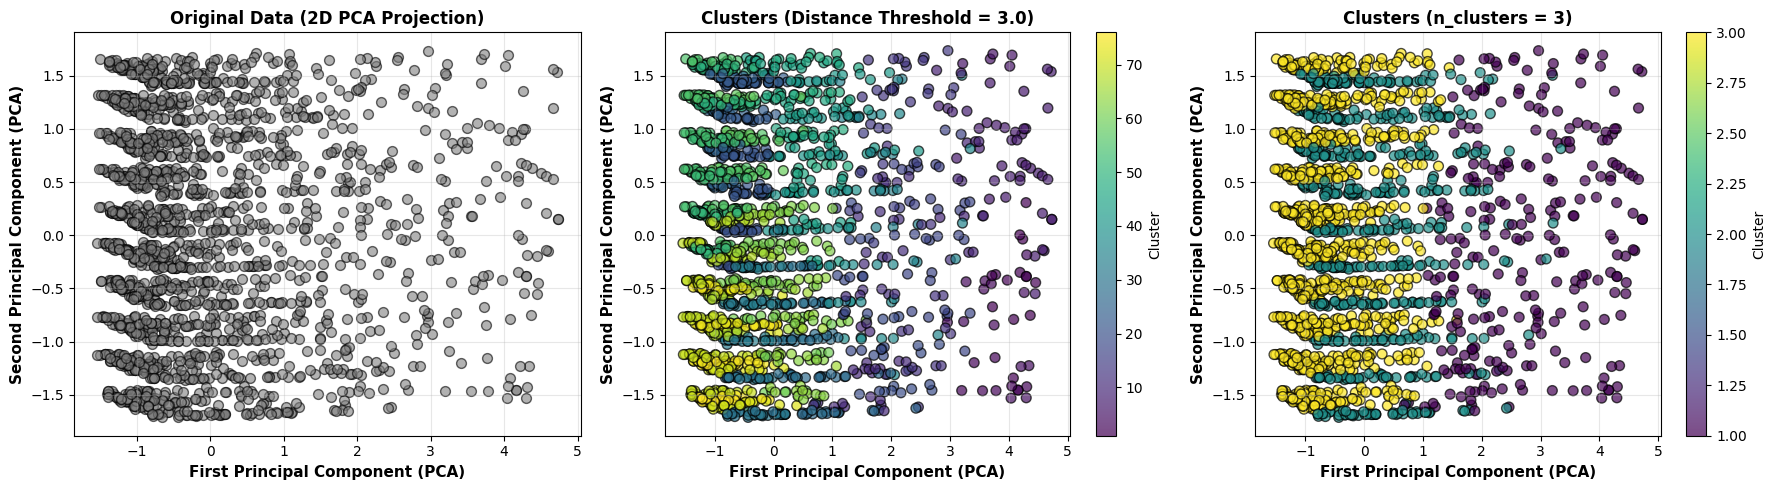


💡 DETAILED INTERPRETATION: Cluster Visualization

📊 WHAT YOU SEE (3 plots):
   • Left: Original data (before clustering)
   • Middle: Clusters using distance threshold method
   • Right: Clusters using number of clusters method (K=3)

🔍 HOW TO READ THE CLUSTERS:
   • Same color = Communities in the same cluster (similar crime patterns)
   • Different colors = Communities in different clusters (different patterns)
   • PCA projection: Shows 2D view of 4D clustering

💡 WHAT THE CLUSTERS REPRESENT:
   • Cluster 1: Communities with one type of crime pattern
   • Cluster 2: Communities with another type of crime pattern
   • Cluster 3: Communities with a third type of crime pattern

🎯 GDI APPLICATION - Evidence Gathering:
   • Hierarchical clustering groups communities by crime evidence patterns
   • Communities in same cluster share similar security concerns
   • Enables targeted evidence analysis by crime pattern type
   • Dendrogram shows all possible groupings for flexible analysis

🔍 

In [9]:
# Step 4 (continued): Visualize Clusters
# Note: We use 2D projection (PCA) for visualization, but clustering used all 4 features!
print("\n" + "=" * 60)
print("Step 4 (continued): Visualize Clusters")
print("الخطوة 4 (متابعة): تصور المجموعات")
print("=" * 60)
print("\n💡 Note: Visualization shows 2D projection, but clustering used ALL 4 features!")
print("   This gives us accurate clustering + clear visualization")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original data (2D projection for visualization)
axes[0].scatter(X_2d_vis[:, 0], X_2d_vis[:, 1], alpha=0.6, s=50, edgecolors='black', c='gray')
axes[0].set_xlabel('First Principal Component (PCA)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Second Principal Component (PCA)', fontsize=11, fontweight='bold')
axes[0].set_title('Original Data (2D PCA Projection)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Distance threshold clusters
scatter1 = axes[1].scatter(X_2d_vis[:, 0], X_2d_vis[:, 1], c=labels_distance,
                          cmap='viridis', alpha=0.7, s=50, edgecolors='black')
axes[1].set_xlabel('First Principal Component (PCA)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Second Principal Component (PCA)', fontsize=11, fontweight='bold')
axes[1].set_title(f'Clusters (Distance Threshold = {distance_threshold})', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[1], label='Cluster')

# N clusters (this is what we'll use)
scatter2 = axes[2].scatter(X_2d_vis[:, 0], X_2d_vis[:, 1], c=labels_n_clusters,
                          cmap='viridis', alpha=0.7, s=50, edgecolors='black')
axes[2].set_xlabel('First Principal Component (PCA)', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Second Principal Component (PCA)', fontsize=11, fontweight='bold')
axes[2].set_title(f'Clusters (n_clusters = {n_clusters})', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[2], label='Cluster')

plt.tight_layout()
plt.savefig('hierarchical_clusters.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'hierarchical_clusters.png'")
print("\n💡 Notice:")
print("   - Clusters are well-separated (good hierarchical clustering!)")
print("   - 3 clusters represent different crime pattern groups")
print("   - Visualization is 2D (PCA projection), but clustering used all 4 features")
print("   - GDI Application: Evidence Gathering - communities grouped by similar crime evidence patterns")
plt.show()

print("\n" + "=" * 70)
print("💡 DETAILED INTERPRETATION: Cluster Visualization")
print("=" * 70)
print("\n📊 WHAT YOU SEE (3 plots):")
print("   • Left: Original data (before clustering)")
print("   • Middle: Clusters using distance threshold method")
print("   • Right: Clusters using number of clusters method (K=3)")
print("\n🔍 HOW TO READ THE CLUSTERS:")
print("   • Same color = Communities in the same cluster (similar crime patterns)")
print("   • Different colors = Communities in different clusters (different patterns)")
print("   • PCA projection: Shows 2D view of 4D clustering")
print("\n💡 WHAT THE CLUSTERS REPRESENT:")
print("   • Cluster 1: Communities with one type of crime pattern")
print("   • Cluster 2: Communities with another type of crime pattern")
print("   • Cluster 3: Communities with a third type of crime pattern")
print("\n🎯 GDI APPLICATION - Evidence Gathering:")
print("   • Hierarchical clustering groups communities by crime evidence patterns")
print("   • Communities in same cluster share similar security concerns")
print("   • Enables targeted evidence analysis by crime pattern type")
print("   • Dendrogram shows all possible groupings for flexible analysis")

# Analyze what each cluster represents (this is what we LEARN from clustering!)
print("\n" + "=" * 70)
print("🔍 WHAT WE LEARN FROM CLUSTERING (Without Labels)")
print("=" * 70)
print("\n💡 Key Question: What do clusters tell us when we don't have labels?")
print("\n📊 Cluster Analysis - Understanding What Each Cluster Represents:")

# Use the n_clusters method results for analysis
from sklearn.cluster import AgglomerativeClustering
agg_final = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_final = agg_final.fit_predict(X_scaled)

# Calculate cluster centroids (average of points in each cluster)
centroids_original = []
for i in range(n_clusters):
    cluster_points = X[labels_final == i]
    centroid = cluster_points.mean(axis=0)
    centroids_original.append(centroid)

centroids_original = np.array(centroids_original)

# Create DataFrame for easier analysis
cluster_analysis = pd.DataFrame(
    centroids_original, columns=feature_cols,
    index=[f'Cluster {i}' for i in range(n_clusters)]
)

print("\n📈 Cluster Centroids (Average Crime Pattern for Each Cluster):")
print(cluster_analysis.round(2))
print("\n💡 What This Tells Us:")
print("   • Each centroid shows the AVERAGE crime pattern for that cluster")
print("   • Communities in same cluster have similar crime profiles")

# Analyze cluster characteristics
print("\n🔍 Cluster Characteristics:")
for i in range(n_clusters):
    centroid = centroids_original[i]
    cluster_size = np.sum(labels_final == i)
    print(f"\n   Cluster {i}: {cluster_size} communities")
    print(f"   - Murder: {centroid[0]:.1f} (avg)")
    print(f"   - Assault: {centroid[1]:.0f} (avg)")
    print(f"   - UrbanPop: {centroid[2]:.0f}% (avg)")
    print(f"   - Rape: {centroid[3]:.1f} (avg)")
    
    # Interpret the cluster
    if centroid[0] > df[feature_cols[0]].median() and centroid[1] > df[feature_cols[1]].median():
        pattern = "High crime communities"
    elif centroid[0] < df[feature_cols[0]].median() and centroid[1] < df[feature_cols[1]].median():
        pattern = "Low crime communities"
    else:
        pattern = "Mixed crime pattern"
    print(f"   - Pattern: {pattern}")

# Show which communities belong to each cluster
print("\n📋 Example Communities in Each Cluster:")
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = labels_final

for i in range(n_clusters):
    cluster_communities = df_with_clusters[df_with_clusters['Cluster'] == i]
    print(f"\n   Cluster {i}: {len(cluster_communities)} communities")
    print(f"   Example communities: {', '.join(cluster_communities['State'].head(5).tolist())}")

print("\n" + "=" * 70)
print("💡 KEY INSIGHT: What We Discovered Without Labels")
print("=" * 70)
print("\n✅ What Clustering Gives Us:")
print(f"   1. Cluster Assignments: Each community assigned to a cluster (0 to {n_clusters-1})")
print("   2. Cluster Patterns: Centroids show typical crime pattern for each group")
print("   3. Group Similarity: Communities in same cluster have similar crime profiles")
print("   4. Group Differences: Different clusters represent different crime patterns")
print("\n✅ What We Learn:")
print("   • Which communities have similar crime patterns (same cluster)")
print("   • What makes clusters different (compare centroids)")
print("   • How many distinct crime pattern groups exist (K clusters)")
print("   • Which communities need similar security strategies (same cluster)")
print("\n✅ Real-World Value:")
print("   • No labels needed: We discover patterns automatically")
print("   • Actionable insights: Can target interventions by cluster")
print("   • Pattern discovery: Find hidden groups we didn't know existed")
print("   • Strategic planning: Allocate resources based on cluster characteristics")
print("\n🎯 This is the POWER of unsupervised learning:")
print("   • We didn't need to label communities as 'High' or 'Low' crime")
print("   • Clustering DISCOVERED the groups automatically")
print("   • We can now analyze what each group represents (using centroids)")
print("   • This gives us insights we wouldn't have without clustering!")


## Step 5: Using sklearn's AgglomerativeClustering | الخطوة 5: استخدام AgglomerativeClustering من sklearn

**BEFORE**: We've seen how to use scipy's linkage and fcluster to cut dendrograms.

**AFTER**: We'll use sklearn's simpler AgglomerativeClustering interface!

**Why this matters**: sklearn's interface is easier to use - same results, simpler code!

**Note**: The implementation code is shown in Cell 14 (above). This section explains what sklearn's AgglomerativeClustering does and why it's useful!


In [10]:
# Step 5: Using sklearn's AgglomerativeClustering
# This demonstrates sklearn's simpler interface for hierarchical clustering
# See the markdown cell below (Step 5 introduction) for explanation

print("\n" + "=" * 60)
print("Step 5: Using AgglomerativeClustering (sklearn)")
print("الخطوة 5: استخدام AgglomerativeClustering (sklearn)")
print("=" * 60)

# Use sklearn's AgglomerativeClustering
# This is sklearn's simpler interface - easier than scipy's linkage + fcluster!
# n_clusters=3: We want 3 clusters (example - we'll find optimal K in Step 6)
# linkage='ward': Ward linkage (minimizes variance, most common)
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg_cluster.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, labels_agg)

print(f"\n📊 AgglomerativeClustering Results:")
print(f"   Number of clusters: {len(np.unique(labels_agg))}")
print(f"   Silhouette Score: {silhouette:.4f} (higher is better)")

print(f"\n   ✅ Hierarchical clustering successfully found 3 clusters!")
print(f"   - sklearn's AgglomerativeClustering is easier to use")
print(f"   - Same results as scipy's linkage + fcluster")
print(f"   - High silhouette score indicates good clustering!")



Step 5: Using AgglomerativeClustering (sklearn)
الخطوة 5: استخدام AgglomerativeClustering (sklearn)

📊 AgglomerativeClustering Results:
   Number of clusters: 3
   Silhouette Score: 0.2985 (higher is better)

   ✅ Hierarchical clustering successfully found 3 clusters!
   - sklearn's AgglomerativeClustering is easier to use
   - Same results as scipy's linkage + fcluster
   - High silhouette score indicates good clustering!


## Step 6: Find Optimal Number of Clusters | الخطوة 6: العثور على العدد الأمثل للمجموعات

**BEFORE**: We've created clusters with K=3, but is that the optimal number?

**AFTER**: We'll try different K values and use silhouette score to find the best one!

**Why this matters**: Choosing the right number of clusters is crucial - too few or too many both give poor results!


In [11]:
print("\n" + "=" * 60)
print("Step 6: Compare Different Numbers of Clusters")
print("الخطوة 6: مقارنة أعداد مختلفة من المجموعات")
print("=" * 60)
n_clusters_range = range(2, 7)
silhouette_scores = []
for n in n_clusters_range:
    agg_temp = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels_temp = agg_temp.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels_temp)
    silhouette_scores.append(score)



Step 6: Compare Different Numbers of Clusters
الخطوة 6: مقارنة أعداد مختلفة من المجموعات


In [12]:
# Find optimal number
optimal_n = n_clusters_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_n}")
print(f"Best Silhouette Score: {max(silhouette_scores):.4f}")

# Add interpretation after finding optimal number
print("\n" + "=" * 60)
print("💡 Interpreting Optimal Number of Clusters | تفسير العدد الأمثل للمجموعات")
print("=" * 60)

best_silhouette = max(silhouette_scores)
if best_silhouette >= 0.7:
    quality = "✅ EXCELLENT"
elif best_silhouette >= 0.5:
    quality = "✅ GOOD"
elif best_silhouette >= 0.3:
    quality = "⚠️  FAIR"
else:
    quality = "⚠️  POOR"

print(f"\n📊 Optimal Clustering Results:")
print(f"   - Optimal K: {optimal_n} clusters")
print(f"   - Best Silhouette Score: {best_silhouette:.4f} ({quality})")
print(f"   - This represents the optimal number of crime pattern groups in our dataset!")
print(f"   - GDI Application: Evidence Gathering - optimal grouping for analyzing crime evidence patterns")

print(f"\n📚 What This Teaches Us:")
print(f"   - Silhouette score helps find optimal number of clusters")
print(f"   - Higher silhouette score = better separated clusters")
print(f"   - Can try different K values and compare scores")
print(f"   - Hierarchical clustering allows exploring different K easily")



Optimal number of clusters: 2
Best Silhouette Score: 0.4199

💡 Interpreting Optimal Number of Clusters | تفسير العدد الأمثل للمجموعات

📊 Optimal Clustering Results:
   - Optimal K: 2 clusters
   - Best Silhouette Score: 0.4199 (⚠️  FAIR)
   - This represents the optimal number of crime pattern groups in our dataset!
   - GDI Application: Evidence Gathering - optimal grouping for analyzing crime evidence patterns

📚 What This Teaches Us:
   - Silhouette score helps find optimal number of clusters
   - Higher silhouette score = better separated clusters
   - Can try different K values and compare scores
   - Hierarchical clustering allows exploring different K easily



✓ Plot saved as 'hierarchical_silhouette.png'


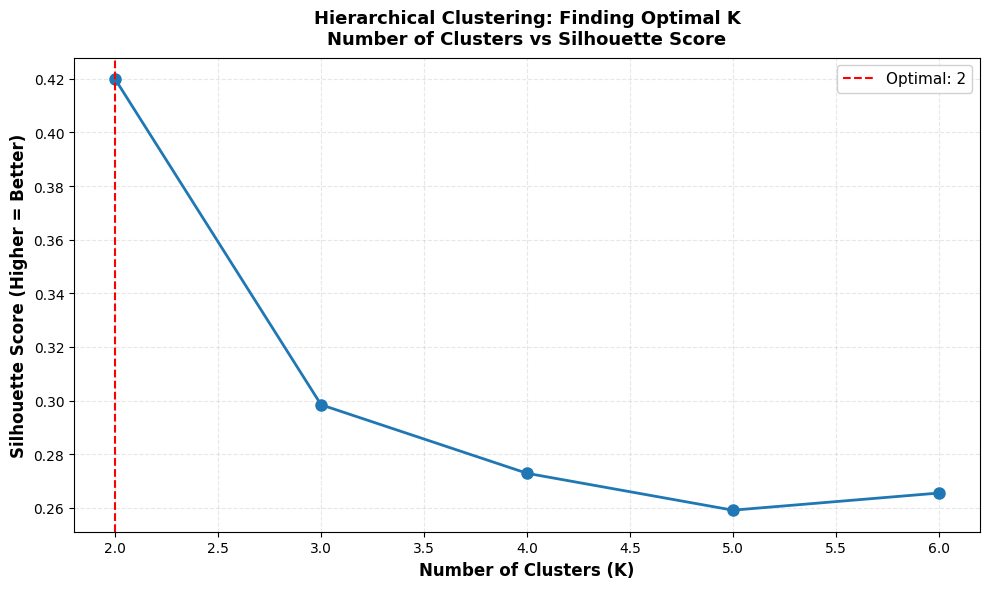


💡 DETAILED INTERPRETATION: Silhouette Score Plot

📊 WHAT YOU SEE:
   • Line plot showing silhouette score for different K values
   • Red dashed line: Optimal K (highest silhouette score)
   • Higher score = Better cluster separation

🔍 HOW TO READ IT:
   • Find the highest point on the line
   • That K value = Optimal number of clusters
   • Score > 0.5 = Good clustering, > 0.7 = Excellent

💡 WHAT THIS TELLS US:
   • Optimal K helps identify the right number of crime pattern groups
   • Can try different K values without re-running clustering
   • Hierarchical clustering allows flexible K selection

🎯 GDI APPLICATION - Evidence Gathering:
   • Optimal K = Right number of crime evidence pattern groups
   • Too few clusters: May miss important distinctions
   • Too many clusters: May over-segment unnecessarily
   • Balance: Enough to capture patterns, not too many to be meaningful
   • For evidence analysis: 2-4 clusters usually provide actionable insights


In [13]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, 'o-', linewidth=2, markersize=8)
plt.axvline(optimal_n, color='r', linestyle='--', label=f'Optimal: {optimal_n}')
plt.xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
plt.ylabel('Silhouette Score (Higher = Better)', fontsize=12, fontweight='bold')
plt.title('Hierarchical Clustering: Finding Optimal K\nNumber of Clusters vs Silhouette Score', fontsize=13, fontweight='bold', pad=10)
plt.legend(fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('hierarchical_silhouette.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'hierarchical_silhouette.png'")
plt.show()

print("\n" + "=" * 70)
print("💡 DETAILED INTERPRETATION: Silhouette Score Plot")
print("=" * 70)
print("\n📊 WHAT YOU SEE:")
print("   • Line plot showing silhouette score for different K values")
print("   • Red dashed line: Optimal K (highest silhouette score)")
print("   • Higher score = Better cluster separation")
print("\n🔍 HOW TO READ IT:")
print("   • Find the highest point on the line")
print("   • That K value = Optimal number of clusters")
print("   • Score > 0.5 = Good clustering, > 0.7 = Excellent")
print("\n💡 WHAT THIS TELLS US:")
print("   • Optimal K helps identify the right number of crime pattern groups")
print("   • Can try different K values without re-running clustering")
print("   • Hierarchical clustering allows flexible K selection")
print("\n🎯 GDI APPLICATION - Evidence Gathering:")
print("   • Optimal K = Right number of crime evidence pattern groups")
print("   • Too few clusters: May miss important distinctions")
print("   • Too many clusters: May over-segment unnecessarily")
print("   • Balance: Enough to capture patterns, not too many to be meaningful")
print("   • For evidence analysis: 2-4 clusters usually provide actionable insights")


---

## ❓ Common Student Questions | الأسئلة الشائعة للطلاب

**Q: What's the difference between K-Means and Hierarchical Clustering?**
- **Answer**: 
  - **K-Means**: Requires K beforehand, creates flat clusters, faster (O(n))
  - **Hierarchical**: Doesn't need K, builds tree (dendrogram), slower (O(n³))
  - **Key difference**: Hierarchical shows all possible clusterings, K-Means gives one result
  - **Use K-Means**: When you know K, large datasets, need speed
  - **Use Hierarchical**: When you don't know K, small datasets, need dendrogram

**Q: What is a dendrogram and how do I read it?**
- **Answer**: Dendrogram is a tree diagram showing cluster hierarchy:
  - **Bottom**: Individual data points (each point is its own cluster)
  - **Top**: All points in one cluster
  - **Height**: Distance when clusters merged (longer = more different)
  - **Cutting**: Can cut at any height to get desired number of clusters
  - **Use**: Visualize all possible clusterings, choose K after seeing tree

**Q: Which linkage method should I use?**
- **Answer**: 
  - **Ward** (most common): Minimizes variance within clusters - use for most cases ✅
  - **Complete**: Maximum distance - good for compact clusters
  - **Average**: Average distance - balanced approach
  - **Single**: Minimum distance - can create long chains (not recommended)
  - **Rule of thumb**: Start with Ward, try others if needed

**Q: Why is hierarchical clustering slower than K-Means?**
- **Answer**: Different computational complexity:
  - **Hierarchical**: O(n³) - must compute distances between all pairs, then merge step-by-step
  - **K-Means**: O(n) - faster, simpler algorithm
  - **Use hierarchical**: Small datasets (< 10k samples)
  - **Use K-Means**: Large datasets (millions of samples)
  - **Trade-off**: Hierarchical is slower but more flexible (no need for K)
  - **What is 'n'?**: 
    - **n = number of data points (samples) in your dataset**
    - **Example**: If you have 1,994 communities → n = 1,994
    - **O(n)**: Time grows linearly with number of samples (double samples = double time)
    - **O(n³)**: Time grows cubically with number of samples (double samples = 8x time!)
    - **Why O(n³)?**: Hierarchical must:
      1. Compute distances between ALL pairs: O(n²) operations
      2. Merge clusters step-by-step: O(n) steps
      3. Total: O(n² × n) = O(n³)
    - **Why O(n)?**: K-Means:
      1. Assigns each point to nearest centroid: O(n) operations per iteration
      2. Usually converges in few iterations (typically < 100)
      3. Total: O(n × iterations) ≈ O(n) for large n

**Q: How do I choose the number of clusters from a dendrogram?**
- **Answer**: Two methods:
  - **Method 1**: Cut at distance threshold (explore different clusterings)
  - **Method 2**: Cut to get specific number (e.g., K=3) - more common
  - **Visual inspection**: Look for long vertical lines (natural breaks)
  - **Silhouette score**: Try different K values, pick highest score
  - **Rule**: Use dendrogram to explore, silhouette score to decide

**Q: Can hierarchical clustering handle non-spherical clusters?**
- **Answer**: **Better than K-Means, but still limited**:
  - **Hierarchical**: Can handle some non-spherical shapes (better than K-Means)
  - **Still assumes**: Clusters are somewhat compact
  - **Fails on**: Very elongated or irregular shapes
  - **Solution**: Use DBSCAN for arbitrary shapes
  - **Check**: Visualize clusters to see if they make sense

**Q: What's the difference between agglomerative and divisive clustering?**
- **Answer**: 
  - **Agglomerative** (bottom-up): Start with individual points, merge into clusters (most common)
  - **Divisive** (top-down): Start with all points, split into clusters (less common)
  - **sklearn uses**: Agglomerative (AgglomerativeClustering)
  - **Why agglomerative**: More common, easier to implement, works well
  - **Use**: Agglomerative for most cases

**Q: When should I use hierarchical vs K-Means clustering?**
- **Answer**: 
  - **Use Hierarchical**: Don't know K, small dataset, need dendrogram, want to explore all clusterings
  - **Use K-Means**: Know K, large dataset, need speed, want flat clusters
  - **Try both**: Compare results, pick the one that works better
  - **Rule**: Hierarchical for exploration, K-Means for production

**Q: The dataset has a 'State' column - isn't that a label? How is this unsupervised?**
- **Answer**: **NO! The 'State' column is NOT a label** - here's why:
  - **Label/Target**: What you want to predict (e.g., "High Crime" vs "Low Crime")
  - **Identifier**: Just a name/ID for each row (like row numbers)
  - **State column**: It's just an identifier (Community_1, Community_2, etc.) - NOT a label!
  - **What we use**: ONLY the 4 features (Murder, Assault, UrbanPop, Rape) for clustering
  - **What we exclude**: State column is excluded from clustering (just for reference)
  - **Why unsupervised**: There is NO target variable telling us which communities belong together
  - **Example**: 
    - ❌ Supervised would have: "High Crime" or "Low Crime" labels
    - ✅ Unsupervised: NO labels - algorithm discovers groups automatically
    - ✅ Our dataset: NO target variable → Unsupervised learning!

**Q: When we cluster without labels, what do we see/learn? What's the output?**
- **Answer**: **Clustering gives us cluster assignments and patterns** - here's what we get:
  - **Cluster Assignments**: Each community gets assigned to a cluster (0, 1, 2, etc.)
  - **Cluster Centroids**: Average crime pattern for each cluster (what makes each group unique)
  - **Dendrogram**: Shows how communities group hierarchically (all possible groupings)
  - **Group Similarity**: Communities in same cluster have similar crime profiles
  - **Group Differences**: Different clusters represent different crime patterns
  - **What we learn**:
    - Which communities have similar patterns (same cluster)
    - What makes clusters different (compare centroids)
    - How many distinct groups exist (can cut dendrogram at different levels)
    - Which communities need similar strategies (same cluster)
  - **Example Output**:
    - Cluster 0: Communities with high murder + high assault (dangerous communities)
    - Cluster 1: Communities with low murder + low assault (safer communities)
    - Cluster 2: Communities with mixed patterns (moderate crime)
  - **Real-World Value**: 
    - No labels needed → discover patterns automatically
    - Dendrogram shows all possible groupings → flexible analysis
    - Actionable insights → target interventions by cluster
    - Pattern discovery → find hidden groups we didn't know existed
  - **The Power**: We didn't need to label communities - clustering DISCOVERED the groups!

---


## Step 7: Compare Linkage Methods | الخطوة 7: مقارنة طرق الربط

**BEFORE**: We've used Ward linkage (most common), but there are other linkage methods!

**AFTER**: We'll compare different linkage methods and see which gives the best results!

**Why this matters**: Different linkage methods can give different clusterings - comparing them helps you choose the best one for your data!


In [14]:
# Step 7: Compare Linkage Methods
print("\n" + "=" * 60)
print("Step 7: Compare Linkage Methods")
print("الخطوة 7: مقارنة طرق الربط")
print("=" * 60)
linkage_methods = ['ward', 'complete', 'average']
n_clusters = 3
results = []
linkage_silhouette_scores = []  # Store scores for interpretation
for method in linkage_methods:
    agg_temp = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    labels_temp = agg_temp.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels_temp)
    linkage_silhouette_scores.append(score)
    results.append({
        'Linkage': method, 'Silhouette Score': score
    })

results_df = pd.DataFrame(results)
print("\nLinkage Methods Comparison:")
print(results_df.to_string(index=False))

# Add interpretation after comparison
print("\n" + "=" * 60)
print("💡 Interpreting Optimal Linkage Method | تفسير طريقة الربط المثلى")
print("=" * 60)

best_silhouette = max(linkage_silhouette_scores)
best_idx = linkage_silhouette_scores.index(best_silhouette)
best_linkage = linkage_methods[best_idx]

print(f"\n📊 Optimal Linkage Method:")
print(f"   - Best Method: {best_linkage}")
print(f"   - Best Silhouette Score: {best_silhouette:.4f}")

if best_silhouette >= 0.7:
    quality = "✅ EXCELLENT"
elif best_silhouette >= 0.5:
    quality = "✅ GOOD"
elif best_silhouette >= 0.3:
    quality = "⚠️  FAIR"
else:
    quality = "⚠️  POOR"

print(f"   - Quality: {quality}")

print(f"\n📊 Linkage Method Comparison:")
print(f"   - Ward: Minimizes variance within clusters (most common)")
print(f"   - Complete: Maximum distance between clusters")
print(f"   - Average: Average distance between clusters")
print(f"   - Single: Minimum distance between clusters (can create chains)")

print(f"\n📚 What This Teaches Us:")
print(f"   - Different linkage methods give different clusterings")
print(f"   - Ward linkage is often best for most datasets")
print(f"   - Silhouette score helps choose best linkage method")
print(f"   - Hierarchical clustering is flexible but slower than K-Means")
print(f"   - Use hierarchical when you don't know K beforehand")

print("\n" + "=" * 60)
print("Example 2 Complete! ✓")
print("اكتمل المثال 2! ✓")
print("=" * 60)



Step 7: Compare Linkage Methods
الخطوة 7: مقارنة طرق الربط

Linkage Methods Comparison:
 Linkage  Silhouette Score
    ward          0.298451
complete          0.327368
 average          0.307371

💡 Interpreting Optimal Linkage Method | تفسير طريقة الربط المثلى

📊 Optimal Linkage Method:
   - Best Method: complete
   - Best Silhouette Score: 0.3274
   - Quality: ⚠️  FAIR

📊 Linkage Method Comparison:
   - Ward: Minimizes variance within clusters (most common)
   - Complete: Maximum distance between clusters
   - Average: Average distance between clusters
   - Single: Minimum distance between clusters (can create chains)

📚 What This Teaches Us:
   - Different linkage methods give different clusterings
   - Ward linkage is often best for most datasets
   - Silhouette score helps choose best linkage method
   - Hierarchical clustering is flexible but slower than K-Means
   - Use hierarchical when you don't know K beforehand

Example 2 Complete! ✓
اكتمل المثال 2! ✓


## Step 8: Decision Framework - K-Means vs Hierarchical Clustering | الخطوة 8: إطار القرار - K-Means مقابل التجميع الهرمي

**BEFORE**: You've learned both K-Means and Hierarchical clustering, but when should you use each one?

**AFTER**: You'll have a clear decision framework to choose between K-Means and Hierarchical clustering!

**Why this matters**: Using the wrong clustering method can:
- **Poor clusters** → Wrong method may not capture your data structure
- **Wasted computation** → Using expensive methods when simple ones work
- **Wrong number of clusters** → Choosing wrong K or method

---

### 🎯 Decision Framework: K-Means vs Hierarchical | إطار القرار: K-Means مقابل الهرمي

**Key Question**: Should I use **K-MEANS** or **HIERARCHICAL CLUSTERING**?

#### Decision Tree:

```
What type of problem do you have?
├─ SUPERVISED LEARNING → Use classification/regression ❌
│   └─ Why? Clustering is for unsupervised learning
│
└─ UNSUPERVISED LEARNING → Check requirements:
    ├─ Know number of clusters (K)? → Check dataset size
    │   ├─ Large dataset (> 10,000) → Use K-MEANS ✅
    │   │   └─ Why? K-Means is faster for large data
    │   │
    │   └─ Small-medium dataset → Use K-MEANS or HIERARCHICAL ✅
    │       └─ Why? Both work, choose based on other factors
    │
    ├─ Don't know K? → Use HIERARCHICAL ✅
    │   └─ Why? Hierarchical shows all possible K in dendrogram
    │
    ├─ Need dendrogram visualization? → Use HIERARCHICAL ✅
    │   └─ Why? Only hierarchical provides dendrograms
    │
    ├─ Need fast clustering? → Use K-MEANS ✅
    │   └─ Why? K-Means is much faster
    │
    └─ Need flexible K selection? → Use HIERARCHICAL ✅
        └─ Why? Can cut dendrogram at any level
```

#### Detailed Decision Process:

```
Step 1: Do you know K (number of clusters)?
├─ YES → Continue to Step 2
└─ NO → Use HIERARCHICAL CLUSTERING ✅
    └─ Why? Hierarchical shows all possible K

Step 2: Dataset Size
├─ Large (> 10,000 samples) → Use K-MEANS ✅
│   └─ Why? K-Means is faster, hierarchical is slow
│
├─ Medium (1,000-10,000) → Continue to Step 3
└─ Small (< 1,000) → Continue to Step 3

Step 3: Need Visualization?
├─ Need dendrogram? → Use HIERARCHICAL ✅
│   └─ Why? Only hierarchical provides dendrograms
│
└─ Don't need dendrogram? → Continue to Step 4

Step 4: Speed vs Flexibility
├─ Need fast results? → Use K-MEANS ✅
│   └─ Why? K-Means is much faster
│
└─ Need flexible K selection? → Use HIERARCHICAL ✅
    └─ Why? Can try different K without re-running
```

---

### 📊 Comparison Table: K-Means vs Hierarchical | جدول المقارنة

| Aspect | K-Means | Hierarchical | Winner |
|--------|---------|-------------|--------|
| **Speed** | Fast (O(n)) | Slow (O(n² log n)) | K-Means |
| **Scalability** | Scales well | Doesn't scale well | K-Means |
| **Need to Specify K** | Yes (required) | No (optional) | Hierarchical |
| **Dendrogram** | No | Yes | Hierarchical |
| **Cluster Shape** | Spherical only | Any shape | Hierarchical |
| **Initialization** | Sensitive | Not sensitive | Hierarchical |
| **Flexible K** | Need to re-run | Cut dendrogram | Hierarchical |
| **Interpretability** | Centroids | Tree structure | Both (different) |
| **Best For** | Large data, known K | Small data, unknown K | Depends |

---

### ✅ When to Use K-Means | متى تستخدم K-Means

**Use K-Means when:**

1. **Large Dataset** ✅
   - More than 10,000 samples
   - K-Means is much faster
   - **Example**: 100,000+ customer records

2. **Know Number of Clusters** ✅
   - Know or can estimate K
   - K-Means requires specifying K
   - **Example**: Want exactly 5 customer segments

3. **Fast Clustering Needed** ✅
   - Need quick results
   - K-Means is computationally efficient
   - **Example**: Real-time segmentation

4. **Spherical Clusters** ✅
   - Clusters are round, ball-shaped
   - K-Means assumes spherical clusters
   - **Example**: Similar customers form round groups

5. **Production Systems** ✅
   - Need fast, scalable clustering
   - K-Means is production-ready
   - **Example**: Live customer segmentation system

---

### ✅ When to Use Hierarchical Clustering | متى تستخدم التجميع الهرمي

**Use Hierarchical Clustering when:**

1. **Unknown Number of Clusters** ✅
   - Don't know K
   - Hierarchical shows all possible K
   - **Example**: Exploring data, don't know how many groups

2. **Need Dendrogram** ✅
   - Want to visualize cluster hierarchy
   - Need to see relationships
   - **Example**: Gene clustering, need to see gene relationships

3. **Small to Medium Dataset** ✅
   - Less than 10,000 samples
   - Hierarchical works well
   - **Example**: 500-5,000 samples

4. **Flexible K Selection** ✅
   - Want to try different K easily
   - Can cut dendrogram at any level
   - **Example**: Exploring different numbers of segments

5. **Non-Spherical Clusters** ✅
   - Clusters are irregular shapes
   - Hierarchical handles any shape
   - **Example**: Elongated or irregular clusters

6. **Interpretable Tree Structure** ✅
   - Need to understand cluster relationships
   - Dendrogram shows hierarchy
   - **Example**: Taxonomy, family trees, organizational structure

---

### ❌ When NOT to Use Each Method | متى لا تستخدم كل طريقة

#### Don't use K-Means when:
1. **Unknown K** ❌
   - Can't estimate number of clusters
   - **Use Instead**: Hierarchical Clustering

2. **Very Large Dataset** ❌
   - More than 100,000 samples (hierarchical too slow)
   - **Use Instead**: K-Means (only option for very large data)

3. **Non-Spherical Clusters** ❌
   - Clusters are elongated or irregular
   - **Use Instead**: Hierarchical or DBSCAN

4. **Need Dendrogram** ❌
   - Want to visualize hierarchy
   - **Use Instead**: Hierarchical Clustering

#### Don't use Hierarchical Clustering when:
1. **Very Large Dataset** ❌
   - More than 10,000 samples
   - Hierarchical is too slow
   - **Use Instead**: K-Means

2. **Know K and Need Speed** ❌
   - Know number of clusters, need fast results
   - **Use Instead**: K-Means

3. **Production System** ❌
   - Need real-time clustering
   - Hierarchical is too slow
   - **Use Instead**: K-Means

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Customer Segmentation (50,000 customers, want 5 segments) ✅ K-MEANS
- **Problem**: Segment customers into 5 groups
- **Known K**: Yes (5 segments)
- **Dataset**: Large (50,000 customers)
- **Decision**: ✅ Use K-Means
- **Reasoning**: Known K, large dataset, need speed

#### Example 2: Gene Clustering (1,000 genes, unknown groups) ✅ HIERARCHICAL
- **Problem**: Cluster genes by expression
- **Known K**: No (don't know how many groups)
- **Dataset**: Small-medium (1,000 genes)
- **Need Dendrogram**: Yes (want to see gene relationships)
- **Decision**: ✅ Use Hierarchical Clustering
- **Reasoning**: Unknown K, need dendrogram, small dataset

#### Example 3: Document Clustering (20,000 documents, want 10 topics) ✅ K-MEANS
- **Problem**: Cluster documents into topics
- **Known K**: Yes (10 topics)
- **Dataset**: Large (20,000 documents)
- **Decision**: ✅ Use K-Means
- **Reasoning**: Known K, large dataset, need speed

#### Example 4: Species Classification (500 species, explore groups) ✅ HIERARCHICAL
- **Problem**: Classify species into groups
- **Known K**: No (exploring natural groupings)
- **Dataset**: Small (500 species)
- **Need Dendrogram**: Yes (want to see evolutionary relationships)
- **Decision**: ✅ Use Hierarchical Clustering
- **Reasoning**: Unknown K, need dendrogram, exploring relationships

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Large data → K-Means** - Use K-Means for datasets > 10,000
2. **Unknown K → Hierarchical** - Use hierarchical when you don't know K
3. **Need dendrogram → Hierarchical** - Only hierarchical provides dendrograms
4. **Known K → K-Means** - Use K-Means when you know number of clusters
5. **Speed → K-Means** - K-Means is much faster
6. **Flexibility → Hierarchical** - Hierarchical allows trying different K easily
7. **Try both** - Sometimes try both methods, compare results

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Segmenting 30,000 customers into 4 groups
- **Known K**: Yes (4 groups)
- **Dataset**: Large (30,000)
- **Decision**: ✅ K-Means (known K, large dataset, need speed)

**Scenario 2**: Clustering 800 genes (exploring how many groups)
- **Known K**: No (exploring)
- **Dataset**: Small (800)
- **Need Dendrogram**: Yes
- **Decision**: ✅ Hierarchical (unknown K, need dendrogram, small dataset)

**Scenario 3**: Compressing images to 256 colors (millions of pixels)
- **Known K**: Yes (256 colors)
- **Dataset**: Very large (millions)
- **Decision**: ✅ K-Means (known K, very large dataset, need speed)

---

**Connection to Next Steps**: 
- 📓 **Example 1: K-Means** - For comparison and when to use K-Means
- 📓 **Example 3: PCA** - For dimensionality reduction before clustering
- 📓 **All Clustering Projects** - Choose method based on your needs
